# Using tensor flow to compare with the K-Means Clustering method on the digits dataset

https://www.youtube.com/watch?v=3JQ3hYko51Y

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn import datasets
from sklearn.utils import shuffle

In [43]:
# Loading dataset
digits = datasets.load_digits()

In [44]:
train_images = digits.data
train_labels = digits.target

In [45]:
digits.data.shape

(1797, 64)

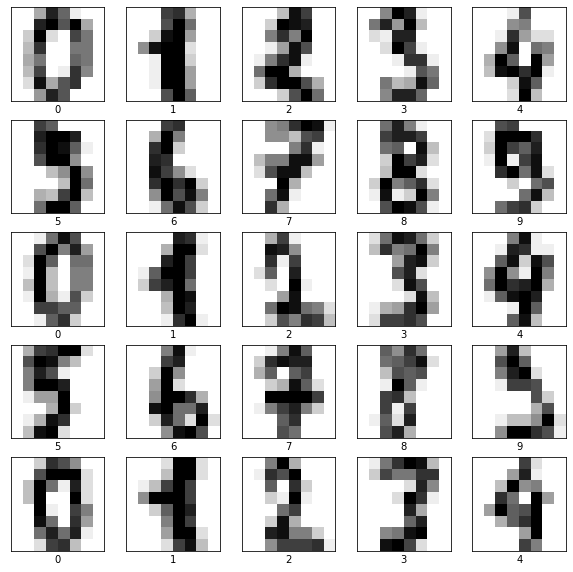

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [47]:
# Flatten - transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
# Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

model = keras.Sequential([
    keras.layers.Dense(128, activation="relu"), # Add a dense layer/fully connected layer - to the hidden layers, activation function set as rectified linear unit
    keras.layers.Dense(10, activation="softmax") # Softmax as activation function, pick values for each neuron so all of those values add up to 1, probability of the network thinking its a certain value
    ])

In [48]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) 

In [49]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(train_images, train_labels, test_size=0.2)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
45/45 [==============================] - 0s 578us/step - loss: 2.9140 - accuracy: 0.4447
Epoch 2/5
45/45 [==============================] - 0s 556us/step - loss: 0.4139 - accuracy: 0.8706
Epoch 3/5
45/45 [==============================] - 0s 567us/step - loss: 0.2288 - accuracy: 0.9339
Epoch 4/5
45/45 [==============================] - 0s 567us/step - loss: 0.1608 - accuracy: 0.9499
Epoch 5/5
45/45 [==============================] - 0s 556us/step - loss: 0.1152 - accuracy: 0.9659


In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Tested Acc:", test_acc)

12/12 [==============================] - 0s 542us/step - loss: 0.2420 - accuracy: 0.9278
Tested Acc: 0.9277777671813965


In [57]:
predictions = model.predict(digits.data)

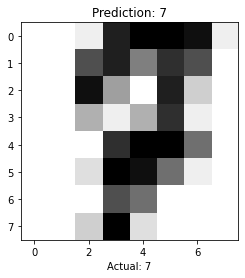

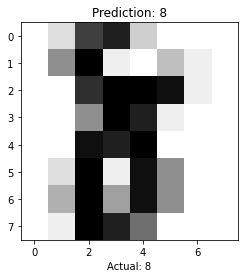

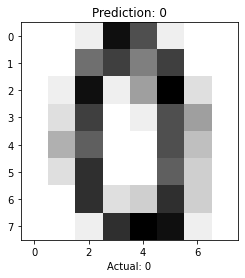

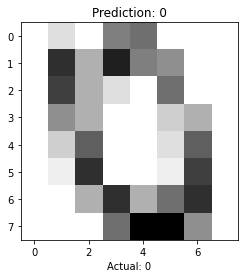

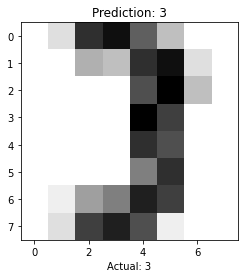

In [93]:
import random

for _ in range(5):
    i = random.randint(1, 1700)
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + str(digits.target[i]))
    plt.title("Prediction: " + str(np.argmax(predictions[i])))
    plt.show()


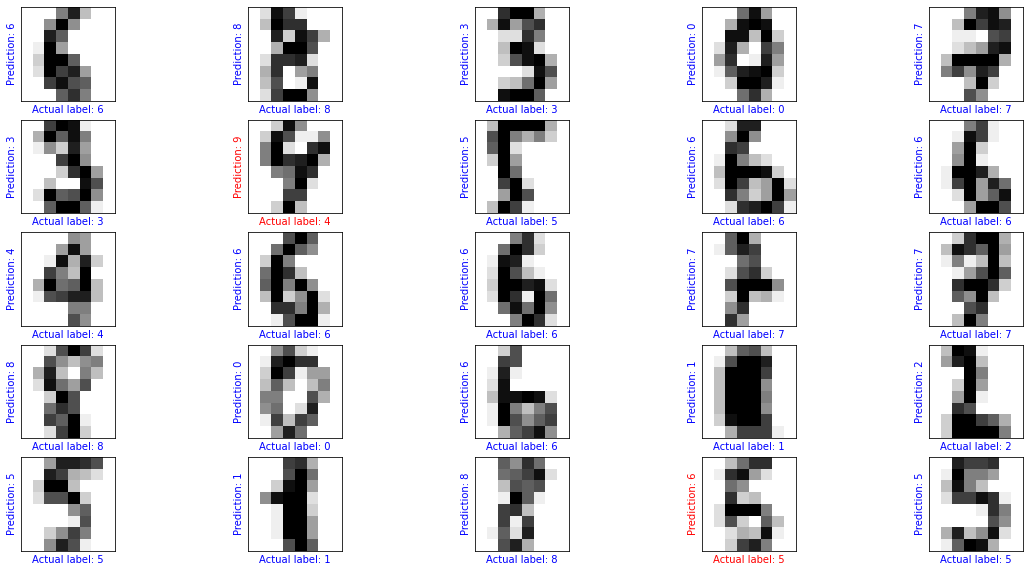

In [101]:
import random

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for _ in range(num_images):
    i = random.randint(1, 1700)
    plt.subplot(num_rows, 2*num_cols, 2*_+1)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == digits.target[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('Actual label: ' + str(digits.target[i]), color=color)
    plt.ylabel("Prediction: " + str(np.argmax(predictions[i])), color=color)
